# **DATA ANALYSIS ON ELECTRIC VEHICLE**

**ABSTARCT**

This analysis explores the trends and dynamics of the electric vehicle (EV) market using a comprehensive dataset that includes various attributes such as vehicle make, model year, electric range, and price. Through exploratory data analysis (EDA), significant insights were drawn regarding the distribution of electric vehicle types, the correlation between electric range and base MSRP, and the popularity of different EV makes over time.

The findings reveal a marked increase in the adoption of EVs, with a notable rise in models categorized under various electric vehicle types. The analysis of electric range highlights its direct influence on consumer purchasing behavior, emphasizing the importance of range capabilities in determining the price of vehicles. Additionally, the animated racing bar plot illustrates the competitive landscape of EV makes, showcasing how different brands have gained or lost market share across the years.

Further analysis using cross-tabulations provided insights into state-wise distribution of EV makes, indicating regional preferences and variations in EV adoption. The choropleth map visualized the concentration of EV vehicles across different locations, highlighting regions with higher adoption rates.

Overall, this analysis underscores the evolving landscape of the electric vehicle market, driven by technological advancements, changing consumer preferences, and policy influences. The insights gained from this study are instrumental for stakeholders—including manufacturers, policymakers, and consumers—in understanding market trends, identifying growth opportunities, and fostering the continued transition towards sustainable transportation solutions.

In [4]:
!pip install plotly

In [26]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 7.1 MB/s eta 0:00:00


In [27]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bar_chart_race as bcr

In [28]:
#Load the dataset into the dataframe
path = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(path)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [30]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [31]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


**DATA CLEANING**

In [32]:
#Checking missing values
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [33]:
#Removing the missing values from Model, Legislative District, Vehicle Location, and Electric Utility
df.dropna(subset=['Model', 'Legislative District', 'Vehicle Location', 'Electric Utility'])

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


**UNIVARIATE ANALYSIS**

In [34]:
# Electric Vehicle Type Distribution
df['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),86044
Plug-in Hybrid Electric Vehicle (PHEV),26590


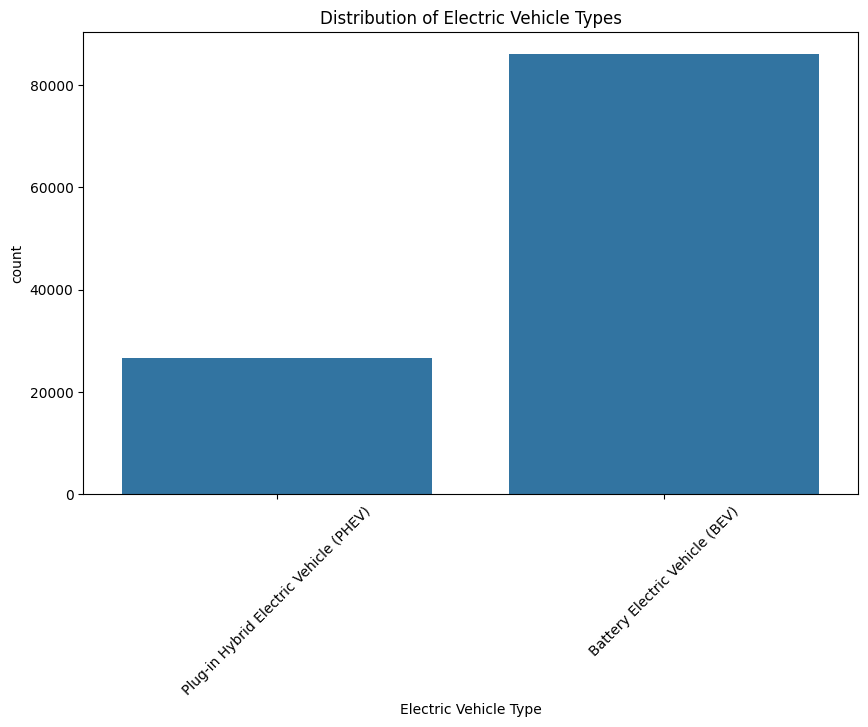

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.show()

**Insight:**


*   The Battery Electric Vehicles (BEVs) make up the majority, suggesting a strong market preference for fully electric vehicles over Plug-in Hybrid Electric Vehicles (PHEVs).
*   This indicate that consumers and manufacturers are moving toward fully electric options, possibly due to increased range, environmental considerations, or advancements in charging infrastructure.



In [36]:
# Distribution of Electric Vehicle Ranges
df['Electric Range'].value_counts().head(10)

,count
Electric Range,
0,39236
215,6306
84,4118
220,4032
238,3473
25,2829
208,2586
19,2575
53,2475


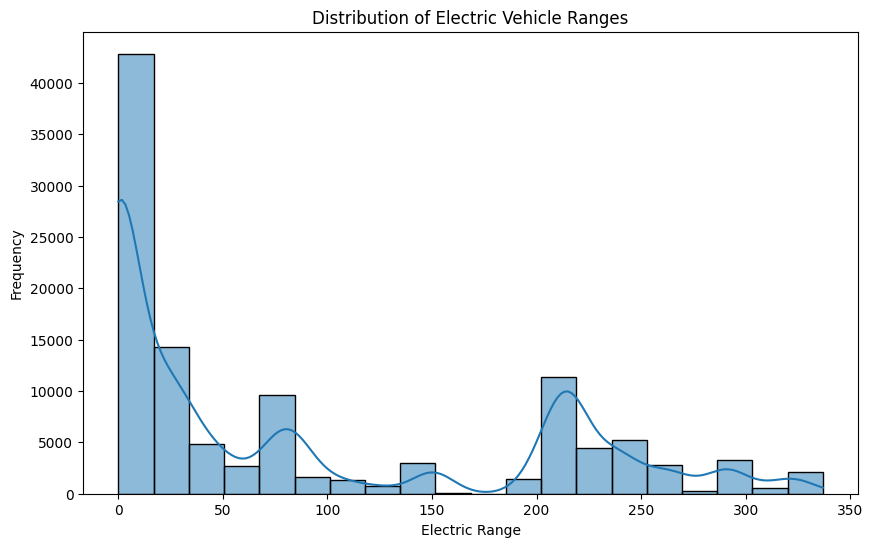

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True)
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

**Insight:**


*   Most vehicles have shorter ranges between 0 and 50, indicating that many consumers use EVs for shorter, daily commutes and are comfortable with more frequent charging.


*   This might suggest a consumer preference for city driving, where charging
stations are more accessible.







In [38]:
# Distribution of Model Years
df['Model Year'].value_counts()

,count
Model Year,
2022,26530
2021,18364
2018,14246
2020,11038
2019,10266
2017,8644
2016,5735
2015,4940
2013,4691


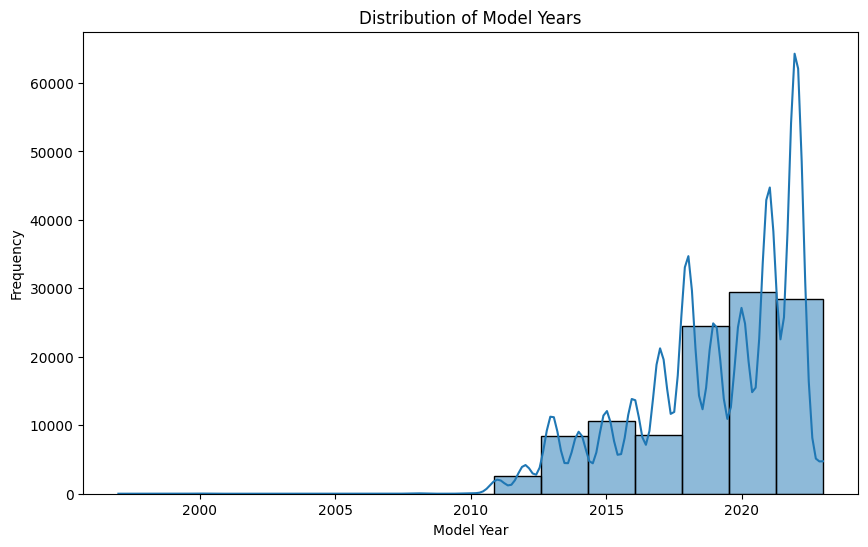

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Model Year'], bins = 15, kde=True)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

**Insight:**


*   The dataset shows a consistent rise from 2010, indicating a growing acceptance and adoption of electric vehicles.
*   It also indicates that more consumers are considering Electric Vehicles.



**BIVARIATE ANALYSIS**

In [40]:
#Bivariate Analysis
# Electric Range vs. Base MSRP
df['Electric Range'].corr(df['Base MSRP'], method='pearson')

0.0850250369824561

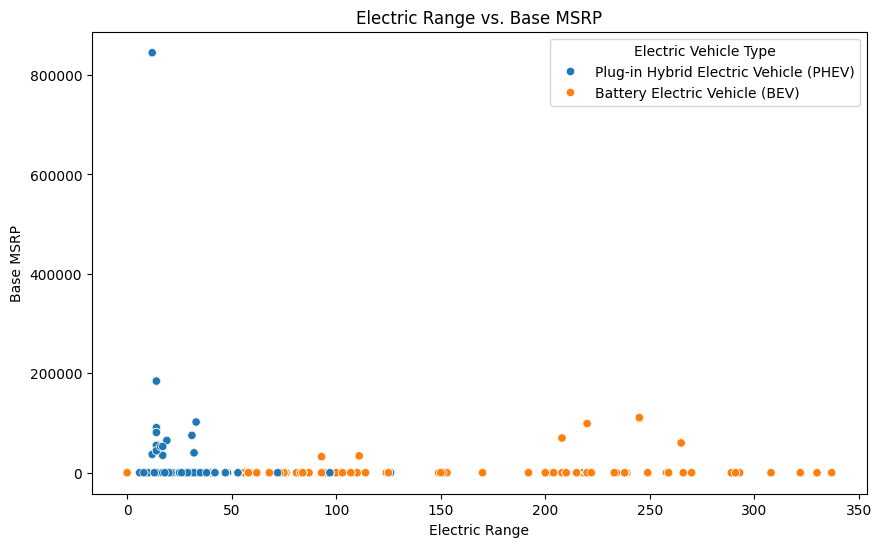

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type')
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()

**Insight:**


*   The Electric Range and Base MSRP are Positively Correlated, indicating that vehicles with longer electric ranges tend to have higher prices.
*   This could be due to the increased costs associated with larger or more advanced batteries needed to provide longer ranges.



In [42]:
# Electric Vehicle Type vs. Base MSRP
df.groupby('Electric Vehicle Type')['Base MSRP'].mean().reset_index()

,Electric Vehicle Type,Base MSRP
0,Battery Electric Vehicle (BEV),1617.547999
1,Plug-in Hybrid Electric Vehicle (PHEV),2362.616961


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



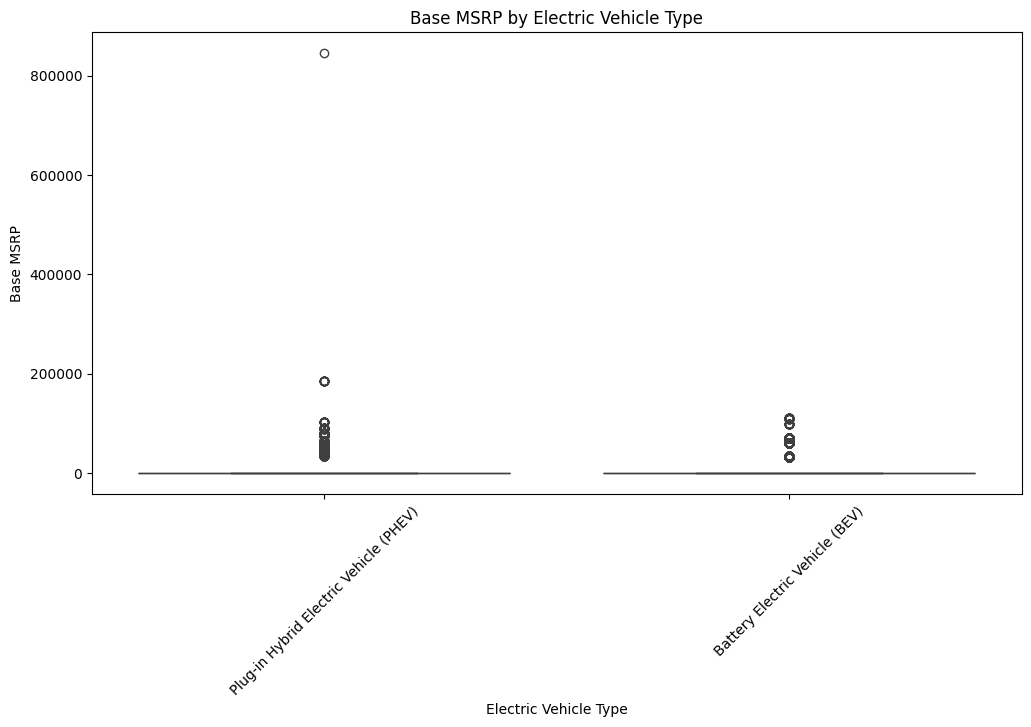

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Base MSRP')
plt.title('Base MSRP by Electric Vehicle Type')
plt.xticks(rotation=45)
plt.show()

**Insight:**


*   The PHEVs dominate the lower price ranges.
*   It suggest that price-sensitive consumers prefer vehicles that offer a combination of electric and gasoline capabilities.



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

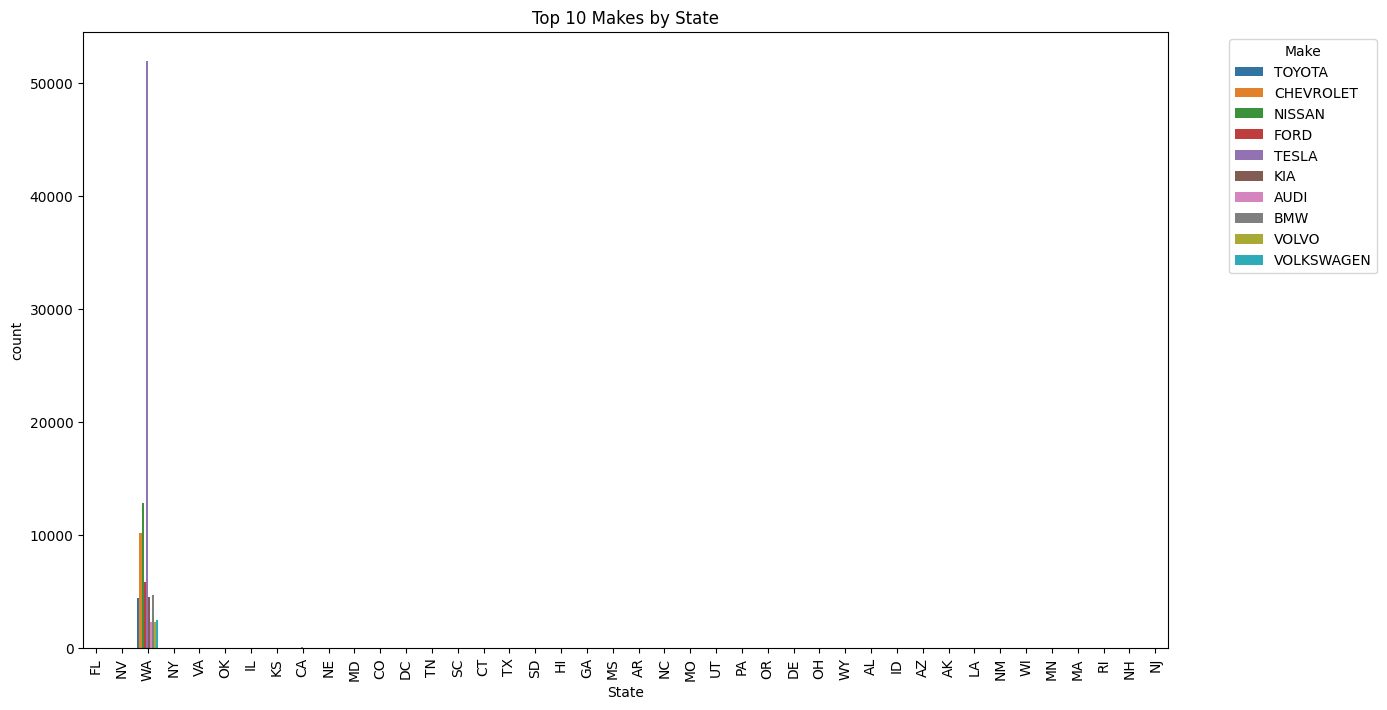

In [44]:
#State vs. Make
plt.figure(figsize=(14, 8))
top_makes = df['Make'].value_counts().nlargest(10).index
df_top_makes = df[df['Make'].isin(top_makes)]
sns.countplot(data=df_top_makes, x='State', hue='Make')
plt.title('Top 10 Makes by State')
plt.xticks(rotation=90)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights:**


*   Tesla has the highest make among all other makes in WA.
*   It reflect the state's strong charging infrastructure, environmental policies, and consumer interest in luxury electric vehicles.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



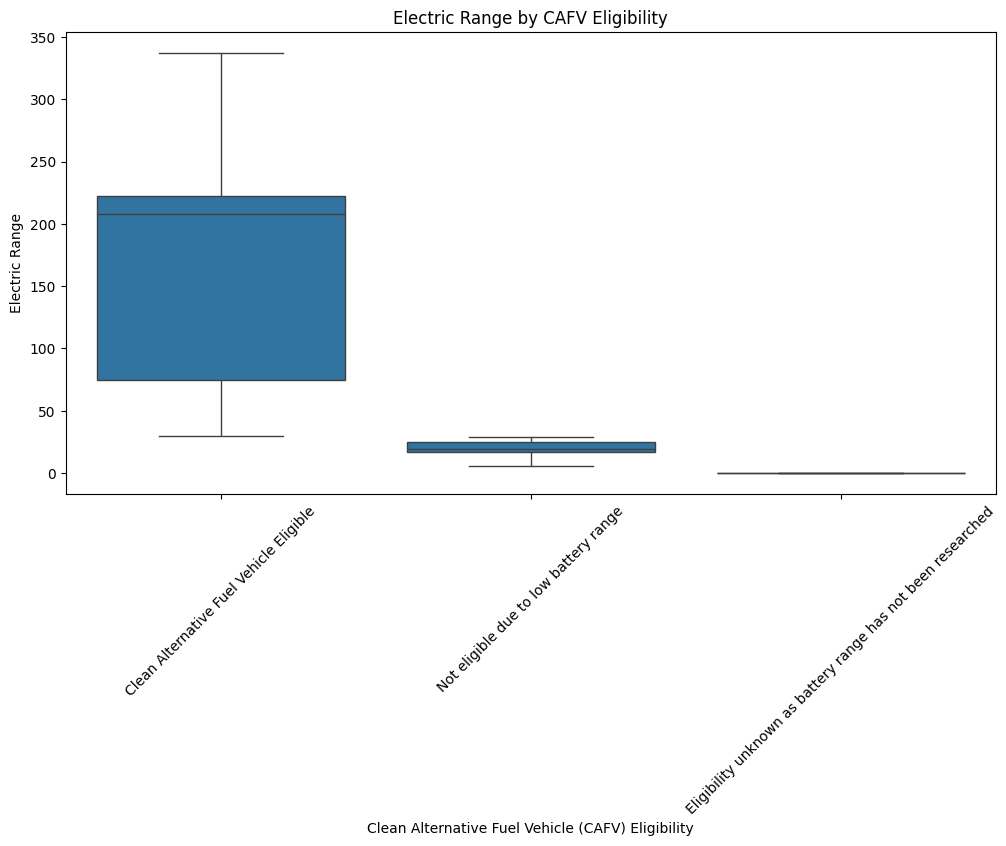

In [45]:
# CAFV Eligibility vs. Electric Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range')
plt.title('Electric Range by CAFV Eligibility')
plt.xticks(rotation=45)
plt.show()

**Insights:**


*   Vehicles with long electric ranges (over 200 miles) that qualify for CAFV incentives may indicate a policy preference for encouraging longer-range EVs, which are generally seen as more practical for daily commuting and long-distance travel.
*   Such a trend might highlight a policy goal to reduce range anxiety and encourage adoption of EVs that require less frequent charging.



**CHOROPLETH PLOT**

In [46]:
#plotly.express
state_counts = df.groupby('State').size().reset_index(name='Vehicle Count')
fig = px.choropleth(
    state_counts,
    locations='State',
    locationmode="USA-states",
    color='Vehicle Count',
    color_continuous_scale="Viridis",
    scope="usa",
    labels={'Vehicle Count': 'Number of EVs'},
    title='Number of Electric Vehicles by State'
)
fig.show()


**Insights:**


*   Most of the states have lower number of Electric Vehicles, indicating limited EV infrastructure, such as charging stations.
*   States with limited incentives may show correspondingly low adoption rates, suggesting that financial incentives play a crucial role in EV adoption.

States with high EV counts are tend to have established charging
infrastructure, state policies and incentives favoring EV purchases, higher levels of environmental awareness and urban density, which support EV usage.










**RACING BAR PLOT**

In [70]:
# Calculate the number of vehicles for each make and year, and assign it to a new DataFrame
df_grouped = df.groupby(['Make', 'Model Year']).size().reset_index(name='Number_of_Vehicles')

# Create the animated racing bar plot with annotations using the new DataFrame
fig = px.bar(df_grouped,  # Use the new DataFrame with 'Number_of_Vehicles' column
             y='Make',  # Place Make on y-axis
             x='Number_of_Vehicles',  # Place the count of EV vehicles on the x-axis
             color='Make',  # Color each make differently
             animation_frame='Model Year',  # Create animation by year
             orientation='h',  # Horizontal bar chart
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )
fig.update_traces(texttemplate='%{x}',  # Display the actual x-axis values (Number_of_Vehicles)
                  textposition='outside',  # Place the text outside the bars
                  textfont_size=16)  # Adjust the font size for better readability

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  # Show grid for better visibility
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,  # Hide legend as it's not necessary for this chart
    title_x=0.5,  # Center title
    title_font=dict(size=20),  # Increase title font size
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
    width=800,  # Set a fixed width
    height=600  # Set a fixed height
)

# Show the plot
fig.show()

**Insights:**


*   The animation reveals which brands consistently rank among the top in terms of the number of EVs. Brands that appear frequently at the top of the list indicate a strong presence and popularity in the EV market.
*   Tesla is consistently leading the race, suggesting that it has established a dominant market share, possibly due to factors like product quality, brand reputation, or a wider range of EV models.



**CONCLUSION**

The comprehensive analysis of the electric vehicle (EV) dataset reveals significant trends and insights into the evolving landscape of the EV market. Through various analytical approaches, including exploratory data analysis, correlation assessments, and visualizations, we have identified key factors influencing the adoption and popularity of electric vehicles.

The increasing diversity of EV types and the direct correlation between electric range and pricing underscore the critical role that technological advancements play in shaping consumer preferences. As consumers increasingly prioritize range and performance, manufacturers must adapt by innovating and enhancing their offerings to remain competitive.

The animated racing bar plot highlights the dynamic nature of the EV market, illustrating how different brands have emerged as leaders and how consumer interests have shifted over the years. This visualization serves as a powerful tool for understanding the competitive landscape, revealing both the challenges and opportunities that lie ahead for established and emerging brands alike.

Regional analyses further underscore the variability in EV adoption across different states, suggesting that local policies, incentives, and consumer behaviors significantly influence the electric vehicle market. This information is crucial for policymakers and stakeholders looking to tailor strategies that encourage further EV adoption in specific regions.

In conclusion, the insights derived from this analysis are not only relevant for automotive manufacturers and industry stakeholders but also for consumers and policymakers aiming to foster a more sustainable transportation ecosystem. As the market continues to evolve, ongoing monitoring and analysis will be essential in navigating the complexities of the electric vehicle landscape and promoting a greener future.